# **Slot Attention-based Classifier for Explainable Image Recognition**



Loading Project and Dependencies

In [ ]:
! git clone -b BT https://github.com/alankriti-mallick/scouter-project.git

Cloning into 'scouter-project'...
remote: Enumerating objects: 264, done.
remote: Counting objects: 100% (264/264), done.
remote: Compressing objects: 100% (218/218), done.
remote: Total 264 (delta 46), reused 250 (delta 37), pack-reused 0
Receiving objects: 100% (264/264), 886.36 KiB | 11.08 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [ ]:
%cd scouter-project

/content/scouter-project


In [ ]:
! pwd

/content/scouter-project


Load Saved Data from Google drive

In [ ]:
# Mount Google-Drive for saved_data

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%%bash
# Loading saved Models

DIR="/content/gdrive/MyDrive/scouter-project/saved_data.zip"
if [ -f "$DIR" ]; then
   echo "'$DIR' found and now copying files, please wait ..."

   # copying files
   cp $DIR ./

   # unzipping
   echo "Extracting...."
   unzip saved_data.zip

   # moving vis folder inside sloter folder
   rm -rf ./sloter/vis
   mv ./vis ./sloter

   # removing zip file
   rm -rf saved_data.zip
   echo "Complete!"
else
   echo "Warning: '$DIR' NOT found."
fi

'/content/gdrive/MyDrive/scouter-project/saved_data.zip' found and now copying files, please wait ...
Extracting....
Archive:  saved_data.zip
   creating: data/
   creating: data/mnist/
   creating: data/mnist/MNIST/
   creating: data/mnist/MNIST/raw/
 extracting: data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz  
  inflating: data/mnist/MNIST/raw/t10k-images-idx3-ubyte  
  inflating: data/mnist/MNIST/raw/train-images-idx3-ubyte.gz  
  inflating: data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz  
  inflating: data/mnist/MNIST/raw/t10k-labels-idx1-ubyte  
 extracting: data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz  
  inflating: data/mnist/MNIST/raw/train-labels-idx1-ubyte  
  inflating: data/mnist/MNIST/raw/train-images-idx3-ubyte  
   creating: data/mnist/MNIST/processed/
  inflating: data/mnist/MNIST/processed/training.pt  
  inflating: data/mnist/MNIST/processed/test.pt  
   creating: saved_model/
  inflating: saved_model/MNIST_use_slot_checkpoint.pth  
  inflating: saved_model/MNIST_u

Installing Dependencies

In [ ]:
%%bash
pip install thop
pip install tensorly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 14.0 MB/s eta 0:00:00


## Pre-processing

In [ ]:
! python train.py --dataset BT --model resnet18 --batch_size 32 --epochs 6 \
--num_classes 4 --use_slot false --vis false --aug false \
# --resume true --epoch 12 --pre_dir saved_model/MNIST_no_slot_checkpoint.pth

Not using distributed mode
train model: without slot positive loss
number of params: 10493440
Start training
start train :0
 12% 241/1950 [00:42<05:00,  5.68it/s]
Traceback (most recent call last):
  File "/content/scouter-project/train.py", line 260, in <module>
    param_translation(args)
  File "/content/scouter-project/train.py", line 240, in param_translation
    main(args)
  File "/content/scouter-project/train.py", line 197, in main
    train_one_epoch(model, data_loader_train, optimizer, device, record, epoch)
  File "/content/scouter-project/engine.py", line 8, in train_one_epoch
    calculation(model, "train", data_loader, device, record, epoch, optimizer)
  File "/content/scouter-project/engine.py", line 37, in calculation
    a = loss.item()
KeyboardInterrupt
^C


# TRAINING MODEL

Positive Scouter for MNIST dataset

In [ ]:
! python train.py --dataset BT --model resnet18 --batch_size 32 --epochs 10 \
--num_classes 4 --use_slot true --use_pre true --loss_status 1 --slots_per_class 1 \
--power 1 --to_k_layer 1 --lambda_value 1. --vis false --channel 512 --aug false \
# --resume true --pre_dir saved_model/BT_use_slot_checkpoint.pth

Not using distributed mode
load pre dataset parameter over
train model: use slot positive loss
number of params: 10560192
Start training
start train :0
100% 937/937 [02:53<00:00,  5.40it/s]
start val :0
100% 157/157 [00:19<00:00,  8.12it/s]
train loss: [0.109]
val loss: [0.04]
train acc: [0.979]
val acc: [0.994]
train CE loss [0.074]
val CE loss [0.028]
train attention loss [0.035]
val attention loss [0.012]
start train :1
100% 937/937 [02:49<00:00,  5.51it/s]
start val :1
100% 157/157 [00:19<00:00,  8.04it/s]
train loss: [0.109, 0.021]
val loss: [0.04, 0.055]
train acc: [0.979, 0.997]
val acc: [0.994, 0.992]
train CE loss [0.074, 0.011]
val CE loss [0.028, 0.046]
train attention loss [0.035, 0.01]
val attention loss [0.012, 0.009]
start train :2
100% 937/937 [02:52<00:00,  5.44it/s]
start val :2
100% 157/157 [00:19<00:00,  7.92it/s]
train loss: [0.109, 0.021, 0.017]
val loss: [0.04, 0.055, 0.04]
train acc: [0.979, 0.997, 0.998]
val acc: [0.994, 0.992, 0.993]
train CE loss [0.074, 0.01


Negative Scouter for MNIST dataset

In [ ]:
! python train.py --dataset BT --model resnet18 --batch_size 32 --epochs 10 \
--num_classes 4 --use_slot true --use_pre false --loss_status -1 --slots_per_class 2 \
--power 2 --to_k_layer 1 --lambda_value 1.5 --vis false --channel 512 --aug false --freeze_layers 3 \
# --resume true --pre_dir saved_model/BT_use_slot_negative_checkpoint.pth

Not using distributed mode
train model: use slot negetive loss
number of params: 8461120
Start training
start train :7
100% 468/468 [02:14<00:00,  3.49it/s]
start val :7
100% 79/79 [00:20<00:00,  3.90it/s]
train loss: [0.088]
val loss: [0.088]
train acc: [0.996]
val acc: [0.992]
train CE loss [0.014]
val CE loss [0.029]
train attention loss [0.049]
val attention loss [0.039]
start train :8
100% 468/468 [02:12<00:00,  3.53it/s]
start val :8
100% 79/79 [00:20<00:00,  3.85it/s]
train loss: [0.088, 0.071]
val loss: [0.088, 0.092]
train acc: [0.996, 0.997]
val acc: [0.992, 0.992]
train CE loss [0.014, 0.012]
val CE loss [0.029, 0.032]
train attention loss [0.049, 0.039]
val attention loss [0.039, 0.04]
start train :9
100% 468/468 [02:12<00:00,  3.52it/s]
start val :9
100% 79/79 [00:21<00:00,  3.64it/s]
train loss: [0.088, 0.071, 0.059]
val loss: [0.088, 0.092, 0.078]
train acc: [0.996, 0.997, 0.998]
val acc: [0.992, 0.992, 0.991]
train CE loss [0.014, 0.012, 0.007]
val CE loss [0.029, 0.032

# TESTING

Positive Scouter for MNIST dataset

In [ ]:
! python test.py --dataset BT --model resnet18 --batch_size 32 --epochs 7 \
--num_classes 4 --use_slot true --use_pre true --loss_status 1 --slots_per_class 1 \
--power 1 --to_k_layer 1 --lambda_value 1. --vis true --channel 512 --aug false

label	 
model
optimizer
lr_scheduler
epoch
args
tensor([7], device='cuda:0')
7


Negative Scouter for MNIST dataset

In [ ]:
! python test.py --dataset BT --model resnet18 --batch_size 32 --epochs 10 \
--num_classes 4 --use_slot true --use_pre false --loss_status -1 --slots_per_class 2 \
--power 2 --to_k_layer 1 --lambda_value 1.5 --vis true --channel 512 --aug false --freeze_layers 3

label	 
model
optimizer
lr_scheduler
epoch
args
tensor([7], device='cuda:0')
7


# VISUALIZATION

Visualization using torchcam for MNIST dataset

In [ ]:
! python torchcam_vis.py --dataset BT --model resnet18 --batch_size 32 \
--num_classes 4 --grad true --use_pre true

Custom Test

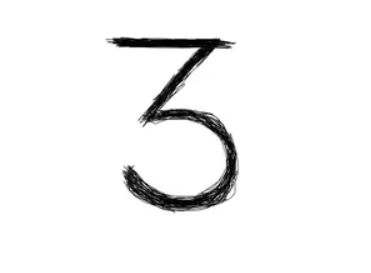

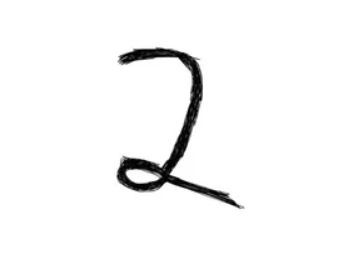

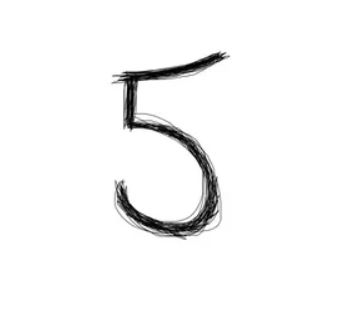

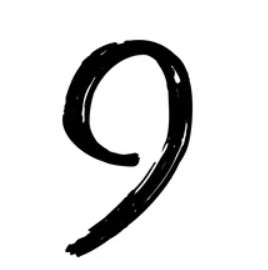

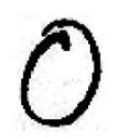

In [ ]:
from IPython.display import Image, display, HTML
from test_custom import run_custom_test

images = ['three.jpg', 'two.jpg', 'five.jpg', 'nine.jpg', 'zero.jpg']
for image in images:
  display(Image(f'/content/scouter-project/test-images/{image}'))

  result = run_custom_test(image=image)
  display(HTML(f'<br /><h1>The Output is {result}</h1><br />'))

Analysis

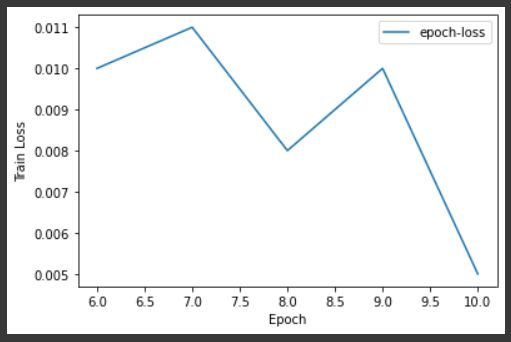

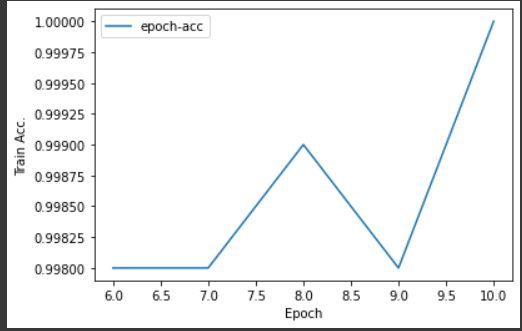

In [ ]:
from IPython.display import Image, display, HTML
display(Image('/content/scouter-project/fig/Train Loss - epoch graph.jpg'))
display(Image('/content/scouter-project/fig/Train Acc. - Epoch Graph.jpg'))

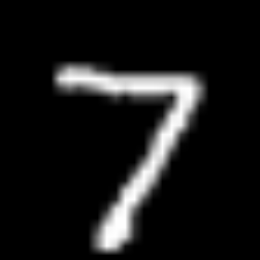

In [ ]:
from IPython.display import Image, display, HTML
display(Image('/content/scouter-project/sloter/vis/image.png'))

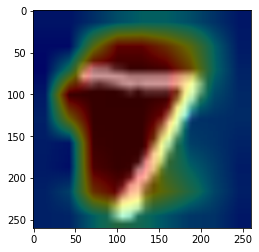

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img1 = Image.open('/content/scouter-project/sloter/vis/slot_mask.png')
plt.imshow(img1)

In [ ]:
from IPython.display import HTML, Image

def _src_from_data(data):
    """Base64 encodes image bytes for inclusion in an HTML img element"""
    img_obj = Image(data=data)
    for bundle in img_obj._repr_mimebundle_():
        for mimetype, b64value in bundle.items():
            if mimetype.startswith('image/'):
                return f'data:{mimetype};base64,{b64value}'

def gallery(images, row_height='auto'):
    figures = []
    for image in images:
        src = _src_from_data(image)
        figures.append(f'''
            <figure style="margin: 5px !important;">
              <img src="{src}" style="height: {row_height}">
            </figure>
        ''')

    return HTML(data=f'''
        <div style="display: flex; flex-flow: row wrap; text-align: center;">
        {''.join(figures)}
        </div>
    ''')


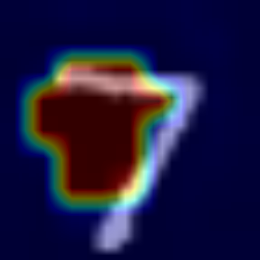
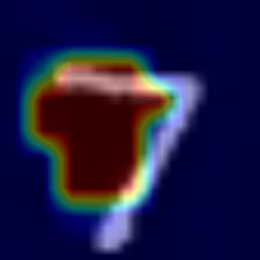
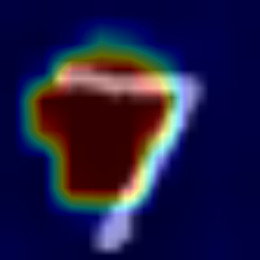
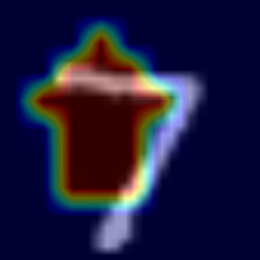
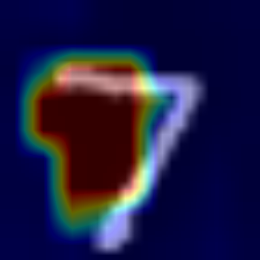
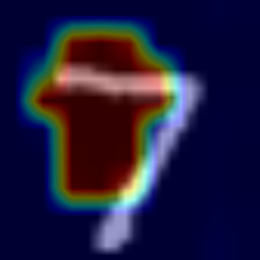
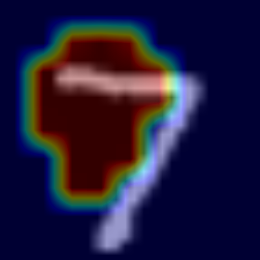
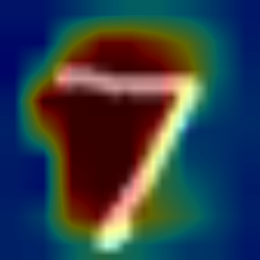
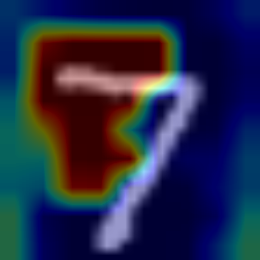
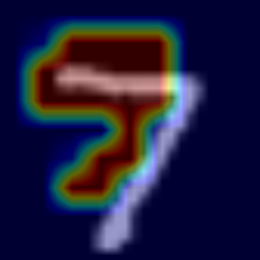

In [ ]:
slot_images = []
for i in range(10):
  slot_images.append(f'/content/scouter-project/sloter/vis/slot_mask_{i}.png')

gallery(slot_images)

## Post Processing and Saving Data

In [ ]:
%%bash
# Zipping data, saved_model and sloter/vis
echo "Generating zip....."
zip -r saved_data.zip ./data ./saved_model
cd ./sloter/
zip -r ../saved_data.zip ./vis
echo "Complete"

Generating zip.....
  adding: data/ (stored 0%)
  adding: data/mnist/ (stored 0%)
  adding: data/mnist/MNIST/ (stored 0%)
  adding: data/mnist/MNIST/raw/ (stored 0%)
  adding: data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz (stored 0%)
  adding: data/mnist/MNIST/raw/t10k-images-idx3-ubyte (deflated 79%)
  adding: data/mnist/MNIST/raw/train-images-idx3-ubyte.gz (deflated 0%)
  adding: data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz (deflated 0%)
  adding: data/mnist/MNIST/raw/t10k-labels-idx1-ubyte (deflated 55%)
  adding: data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz (stored 0%)
  adding: data/mnist/MNIST/raw/train-labels-idx1-ubyte (deflated 52%)
  adding: data/mnist/MNIST/raw/train-images-idx3-ubyte (deflated 79%)
  adding: data/mnist/MNIST/processed/ (stored 0%)
  adding: data/mnist/MNIST/processed/training.pt (deflated 79%)
  adding: data/mnist/MNIST/processed/test.pt (deflated 79%)
  adding: saved_model/ (stored 0%)
  adding: saved_model/MNIST_use_slot_checkpoint.pth (deflated 7%)

Save data to drive

In [ ]:
# Mount Google-Drive for saved_data
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%%bash

DIR="/content/gdrive/MyDrive/scouter-project/"
if [ -d "$DIR" ]; then
   echo "'$DIR' found and now copying files, please wait ..."
else
   echo "Warning: '$DIR' NOT found. Creating the folder..."
   mkdir $DIR
fi

cp saved_data.zip $DIR
echo "Copying Complete!"

'/content/gdrive/MyDrive/scouter-project/' found and now copying files, please wait ...
Copying Complete!


In [ ]:
! rm -rf saved_data.zip

Download Data

In [ ]:
from google.colab import files
files.download('saved_data.zip') 

In [ ]:
%cd /content/

/content


In [ ]:
! rm -rf ./scouter-project

In [ ]:
! free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        4.0G        6.7G         15M        2.0G        8.6G
Swap:            0B          0B          0B


In [ ]:
! zip -r model_postive.zip ./saved_model/MNIST_use_slot_checkpoint.pth

  adding: saved_model/MNIST_use_slot_checkpoint.pth (deflated 7%)
